In [54]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_absolute_error


from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot

In [6]:
def load_dataset():
    path= Path(r'C:\Users\Anjelito\Documents\personal project\regression - student grade\data\dataset')

    X_test= pd.read_csv(path/'X_test.csv')
    X_train= pd.read_csv(path/'X_train.csv')
    y_test= pd.read_csv(path/'y_test.csv')
    y_train= pd.read_csv(path/'y_train.csv')

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= load_dataset()

In [41]:
models= []
maes= []

for model in [
    DummyClassifier,
    KNeighborsRegressor,
    SVR,
    DecisionTreeRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    XGBRegressor,
]:
    cls = model()
    kfold = model_selection.KFold(
        n_splits= 5, random_state= 42, shuffle= True
    )

    s = model_selection.cross_val_score(
        cls, X_train, y_train.values.ravel(), scoring= "neg_mean_absolute_error", cv= kfold
    )

    models.append(model.__name__)
    maes.append(abs(s.mean()))

results= pd.DataFrame(zip(models, maes), columns= ['model', 'mae']).sort_values('mae', ascending= True, ignore_index= True)
results

,model,mae
0,RandomForestRegressor,2.448285
1,SVR,2.519136
2,GradientBoostingRegressor,2.538509
3,AdaBoostRegressor,2.559419
4,KNeighborsRegressor,2.594209
5,XGBRegressor,2.672559
6,DummyClassifier,2.737881
7,DecisionTreeRegressor,3.182003


In [43]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 80, 100, 120],
    'max_features': [4, 5, 6],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [20, 40, 60, 80, 100]
}

model= RandomForestRegressor()
cv = StratifiedKFold(n_splits= 3)

grid_search= GridSearchCV(
    estimator= model, 
    param_grid= param_grid, 
    cv= cv, 
    scoring= 'neg_mean_absolute_error',
    return_train_score= True
)

grid_search.fit(X_train, y_train.values.ravel())
best_model= grid_search.best_estimator_

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [44]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 60}

In [47]:
(pd.DataFrame(grid_search.cv_results_)
    ['mean_test_score']
    .abs()
    .min()
)

2.491394186049788

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


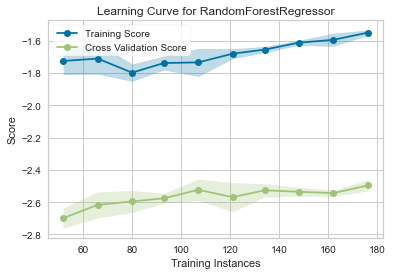

In [50]:
sizes = np.linspace(0.3, 1.0, 10)

cv = StratifiedKFold(n_splits= 3)
visualizer = LearningCurve(
    best_model, cv= cv, scoring='neg_mean_absolute_error', train_sizes= sizes, n_jobs=4
)

visualizer.fit(X_train, y_train.values.ravel())        
visualizer.show()     
plt.show()      

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


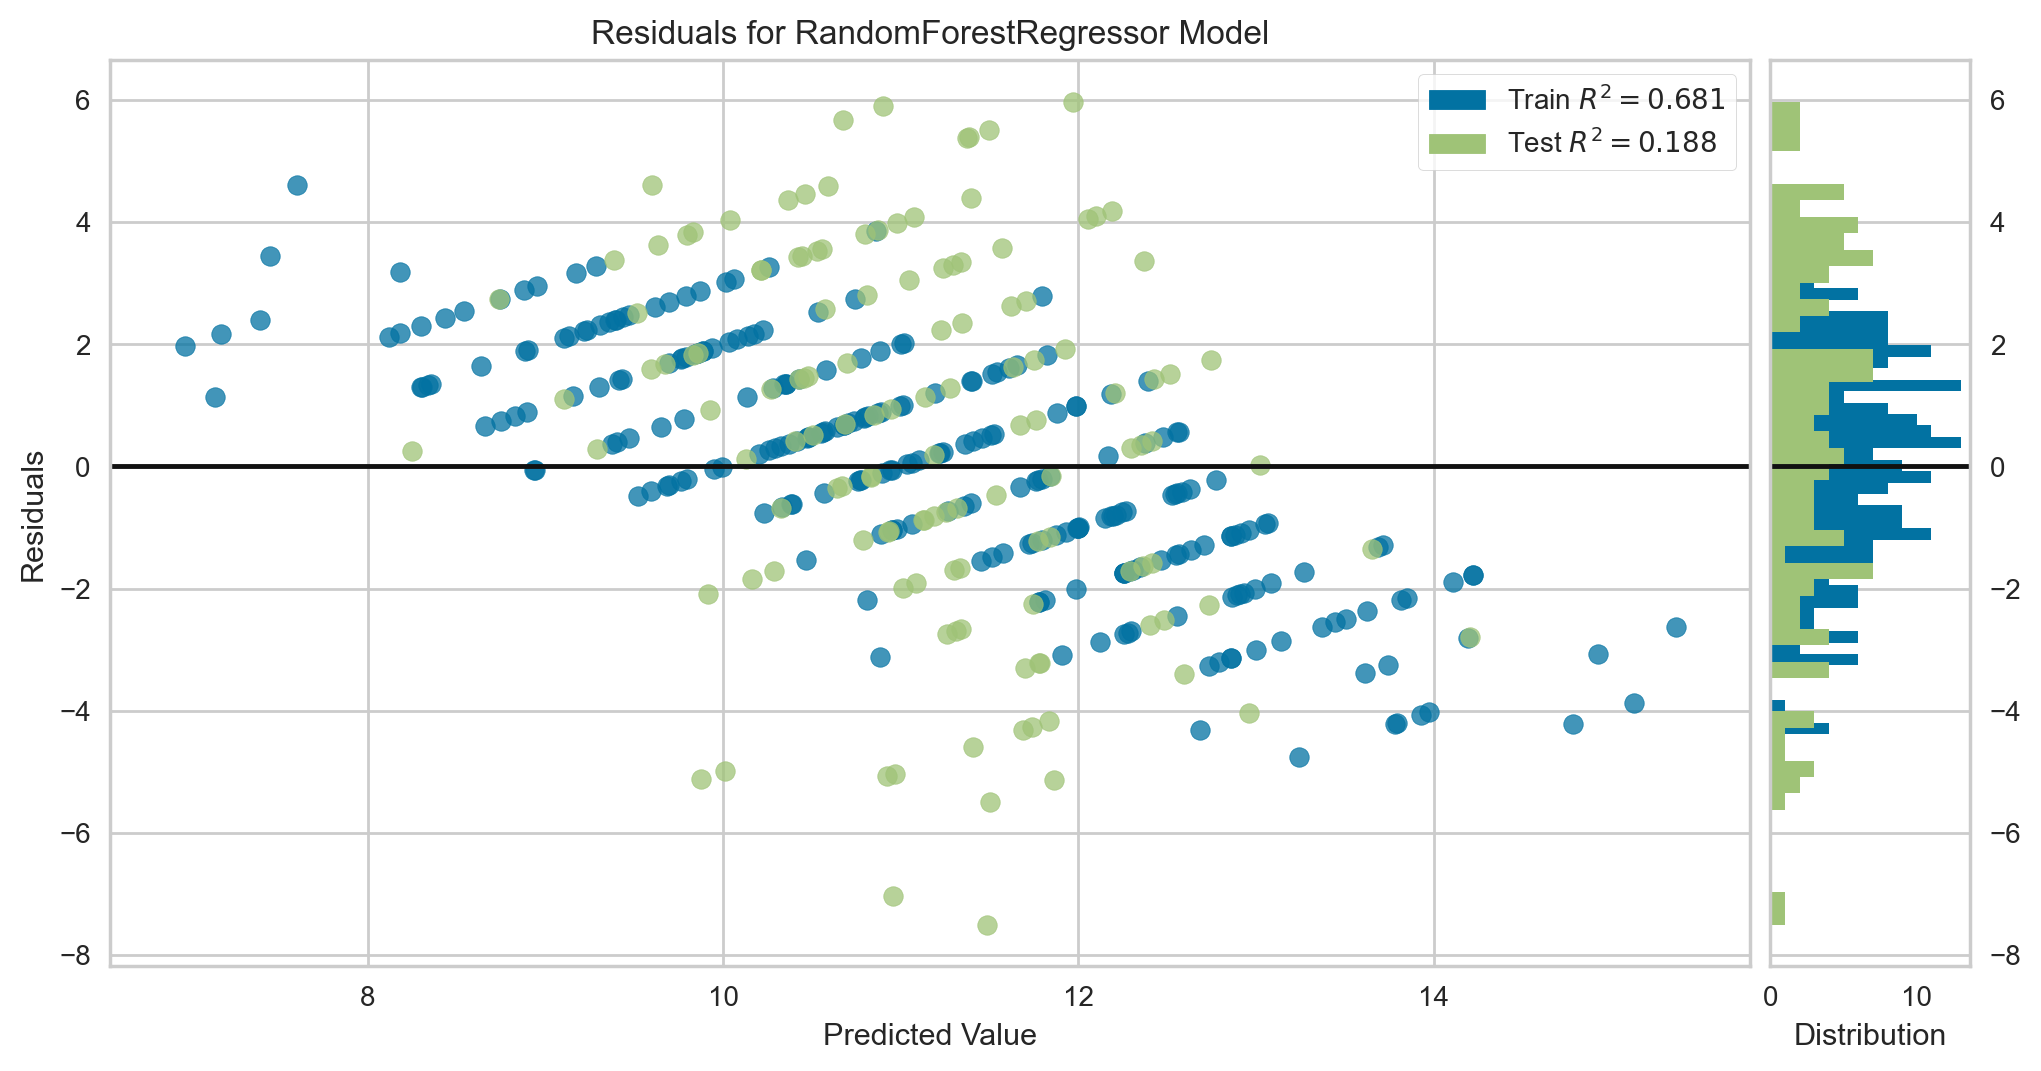

In [68]:
fig, ax= plt.subplots(figsize= (12, 6), dpi= 200)

visualizer = ResidualsPlot(best_model, ax= ax)

visualizer.fit(X_train, y_train.values.ravel()) 
visualizer.score(X_test, y_test.values.ravel()) 
visualizer.show()    

fig.savefig(
    r'C:\Users\Anjelito\Documents\personal project\regression - student grade\result\images\residual.png',
    bbox_inches= 'tight',
    facecolor= 'white'
    )
plt.show()  

In [55]:
y_pred= best_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.5348203015582964

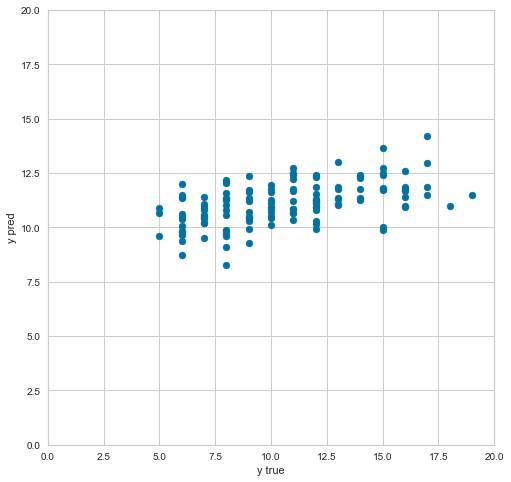

In [56]:
fig, ax= plt.subplots(figsize= (8, 8))
ax.scatter(y_test, y_pred)
ax.set_ylim(0, 20)
ax.set_xlim(0, 20)
ax.set_xlabel('y true')
ax.set_ylabel('y pred')

plt.show()